CLUSTERIN ALL TRAFFIC

In [466]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math


In [467]:
data_1 = pd.read_csv('clustering_1.csv')
data_1.drop(['@timestamp'], inplace=True, axis = 'columns')


In [468]:
data_2 = pd.read_csv('clustering_2.csv')
data_2.drop(['@timestamp', '@timestamp.1'], inplace=True, axis = 'columns')
data_2

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,34.238.162.185,"9,200","2,585,306","2,716","5,520,068,067,690","14,052,398","7,978","11,467,092","5,262","48,878",172.23.0.2,tcp,ipv4
1,34.238.162.185,"9,200","1,292,653","1,358","5,520,067,973,394","7,026,199","3,989","5,733,546","2,631","48,878",172.31.91.217,tcp,ipv4
2,34.238.162.185,"9,200","34,906,544","25,101","5,520,534,082,374","193,921,585","47,324","159,015,041","22,223","49,266",172.31.91.217,tcp,ipv4
3,192.168.17.18,"5,671","288,546","4,042","5,521,562,845,831","842,416","8,092","553,870","4,050","42,744",192.168.17.12,tcp,ipv4
4,192.168.17.13,"47,610","560,472","4,050","5,524,130,518,642","849,154","8,094","288,682","4,044","5,671",192.168.17.18,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64334,192.168.17.2,"13,004","4,860",6,"544,248","7,028",18,"2,168",12,"44,562",192.168.17.3,tcp,ipv4
64335,192.168.17.13,"13,005","4,868",6,"836,614","7,036",18,"2,168",12,"38,376",192.168.17.3,tcp,ipv4
64336,192.168.17.14,"13,003","4,872",6,"893,206","7,040",18,"2,168",12,"53,082",192.168.17.3,tcp,ipv4
64337,192.168.17.16,"13,006","4,852",6,"613,349","7,020",18,"2,168",12,"46,386",192.168.17.3,tcp,ipv4


PREPROCESSING

In [469]:
data_all = pd.concat([data_1.iloc[5630:15360], data_2.sample(10000)], axis=0, ignore_index=True, sort=False)
data_all

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,192.168.17.12,"13,001","2,840",12,"934,325,235","4,006",24,"1,166",12,"32,848",192.168.17.3,tcp,ipv4
1,192.168.17.16,"13,006",152,2,"179,059",440,6,288,4,"43,190",192.168.17.3,tcp,ipv4
2,192.168.17.11,"13,002","1,154",12,"5,969,612","2,320",24,"1,166",12,"57,188",192.168.17.18,tcp,ipv4
3,192.168.17.17,"5,671","11,094",30,"2,768,186","23,428",66,"12,334",36,"59,150",192.168.17.11,tcp,ipv4
4,192.168.17.13,"13,005","1,018",10,"521,666,103","2,320",24,"1,302",14,"33,244",192.168.17.18,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,192.168.17.14,"13,003","4,872",6,"532,865","7,040",18,"2,168",12,"58,522",192.168.17.3,tcp,ipv4
19726,192.168.17.11,"13,002","6,052",18,"1,623,590","8,462",36,"2,410",18,"35,328",192.168.17.19,tcp,ipv4
19727,192.168.17.16,"13,006","5,924",16,"995,913","8,198",32,"2,274",16,"55,814",192.168.17.19,tcp,ipv4
19728,192.168.17.17,"13,007","4,876",6,"541,850","7,044",18,"2,168",12,"60,984",192.168.17.3,tcp,ipv4


In [470]:
# Eliminamos las variables de poco interes
data_ini = data_all.copy()
data_all.drop(['destination.port', 'source.port', 'destination.ip', 'source.ip', 'network.type', 'network.transport'], axis = 'columns', inplace=True)
len_col = data_all.shape[1]
len_row = data_all.shape[0]


In [471]:
#check dimen pre
data_all.shape

(19730, 7)

In [472]:
#Eliminamos las variables que tienen mas de un 80% de valores nan
name = data_all.columns.values.tolist()
for i in range(len_col):
    cc = data_all[name[i]].isnull().sum()
    condition = (cc/len_row)
    if (condition > 0.8):
        data_all.drop([name[i]], axis = 'columns', inplace = True)
#Eliminamos las filas con nan
data_all = data_all.dropna()
data_ini = data_ini.dropna()
post = data_all.shape  


In [473]:
#check dimen post
data_all.shape

(19380, 7)

In [474]:
#check nan
pd.isnull(data_all).sum() > 0

destination.bytes      False
destination.packets    False
event.duration         False
network.bytes          False
network.packets        False
source.bytes           False
source.packets         False
dtype: bool

In [475]:
# Remove commas
name2 = data_all.columns.values.tolist()
len_col2=len(name2)

for i in range(len_col2):
    data_all[name2[i]].replace(',','',regex=True,inplace=True)
    data_ini[name2[i]].replace(',','',regex=True,inplace=True)



/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [476]:
#Proprocessed csv
data_all.to_csv (r'work_data_prepro.csv', index = None, header=True)
print("Dataframe preprocessed")
data_all

Dataframe preprocessed


,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
0,2840,12,934325235,4006,24,1166,12
1,152,2,179059,440,6,288,4
2,1154,12,5969612,2320,24,1166,12
3,11094,30,2768186,23428,66,12334,36
4,1018,10,521666103,2320,24,1302,14
...,...,...,...,...,...,...,...
19725,4872,6,532865,7040,18,2168,12
19726,6052,18,1623590,8462,36,2410,18
19727,5924,16,995913,8198,32,2274,16
19728,4876,6,541850,7044,18,2168,12


CLUSTERING

In [477]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
#data.drop(['network.transport'], axis = 'columns', inplace=True)


In [478]:
# Clustering Dataframe X
X = data_all.copy()
X = X.astype("int64")
name_post_clust = data_all.columns.values.tolist()




In [479]:
#Standardization
X_standarized = StandardScaler().fit_transform(X)
standarized_df = pd.DataFrame(data=X_standarized, columns=name_post_clust)
standarized_df.describe()
standarized_df.head(6)

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
0,-0.092960,-0.091285,-0.318847,-0.071317,-0.092020,-0.062784,-0.092684
1,-0.094725,-0.092964,-0.319772,-0.071841,-0.093529,-0.062944,-0.094022
2,-0.094067,-0.091285,-0.319767,-0.071565,-0.092020,-0.062784,-0.092684
3,-0.087538,-0.088263,-0.319770,-0.068466,-0.088499,-0.060747,-0.088667
4,-0.094156,-0.091621,-0.319256,-0.071565,-0.092020,-0.062759,-0.092349
5,-0.087448,-0.087928,-0.319261,-0.068445,-0.088331,-0.060747,-0.088667


In [480]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=50).fit(X_standarized) # eps = radio , min_samples = muestras minimas
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#print info
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 247
Silhouette Coefficient: 0.882


0
1
2
-1


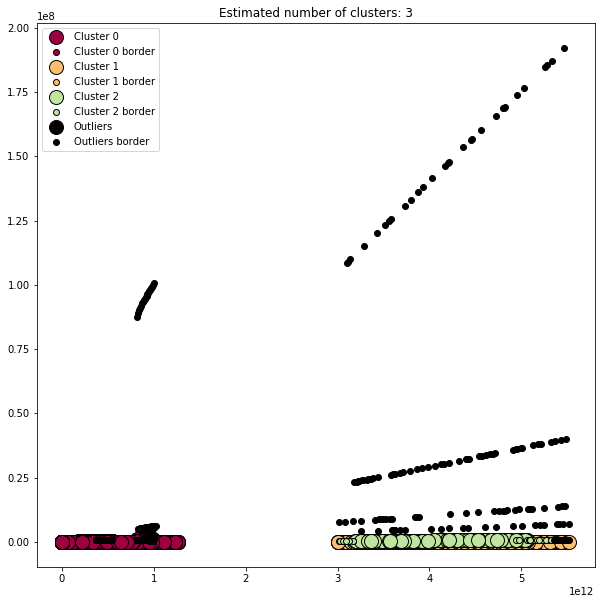

In [481]:
# Plot result DBSCAN
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
legend_labels = list()
for k, col in zip(unique_labels, colors):
    print(k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        legend_labels.append("Outliers")
        legend_labels.append("Outliers border")
    else:
        legend_labels.append("Cluster "+str(k))
        legend_labels.append("Cluster "+str(k)+" border")

    class_member_mask = (labels == k)

    xy = X.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    xy = X.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.legend(legend_labels)
plt.show()

In [482]:
# % outliers/ruido
outliers = (X_standarized[labels==-1].shape[0]/X_standarized[labels!=-1].shape[0])*100
print(round(outliers,2), '%')

1.29 %


In [483]:
# Dataframe create
X_outlier = data_ini[labels == -1]
X_clust = data_ini.loc[(labels == 0) | (labels == 1) | (labels == 2)]
Xcluster = {}
for i in range(n_clusters_):
    Xcluster["cluster{0}".format(i)] = data_ini[labels == i]
x_outlier_df = pd.DataFrame(data=X_outlier, columns = data_ini.columns)
x_clust_df = pd.DataFrame(data=X_clust, columns = data_ini.columns)

In [484]:
def plot_cluster(data, num_cluster, columns):
    # Plot result DBSCAN

    plt.figure(figsize=(10,10))
    # Black removed and is used for noise instead.
    legend_labels = list()

    legend_labels.append("Cluster"+str(num_cluster))
    legend_labels.append("Cluster "+ str(num_cluster)+ " Border")


    xy = data[columns].values
    xy = xy.astype("int64")
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='r',
             markeredgecolor='k', markersize=14)


    plt.title('Cluster '+str(num_cluster))
    plt.legend(legend_labels)
    return plt

# Cluster 0

In [485]:
Xcluster["cluster0"]

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
0,192.168.17.12,"13,001",2840,12,934325235,4006,24,1166,12,"32,848",192.168.17.3,tcp,ipv4
1,192.168.17.16,"13,006",152,2,179059,440,6,288,4,"43,190",192.168.17.3,tcp,ipv4
2,192.168.17.11,"13,002",1154,12,5969612,2320,24,1166,12,"57,188",192.168.17.18,tcp,ipv4
3,192.168.17.17,"5,671",11094,30,2768186,23428,66,12334,36,"59,150",192.168.17.11,tcp,ipv4
4,192.168.17.13,"13,005",1018,10,521666103,2320,24,1302,14,"33,244",192.168.17.18,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,192.168.17.14,"13,003",4872,6,532865,7040,18,2168,12,"58,522",192.168.17.3,tcp,ipv4
19726,192.168.17.11,"13,002",6052,18,1623590,8462,36,2410,18,"35,328",192.168.17.19,tcp,ipv4
19727,192.168.17.16,"13,006",5924,16,995913,8198,32,2274,16,"55,814",192.168.17.19,tcp,ipv4
19728,192.168.17.17,"13,007",4876,6,541850,7044,18,2168,12,"60,984",192.168.17.3,tcp,ipv4


There are changes from the LT approach, new traffic is inserted in this cluster but there are also similarities. Same ports as in LT case are in this cluster and same destination IPs appear. Probably, the first cluster from the LT approach is inserted into this new cluster.

In [486]:
print("Destination IPs: "+Xcluster["cluster0"]["destination.ip"].unique())
print("Destination Ports: "+Xcluster["cluster0"]["destination.port"].unique())
print("Source IPs: "+Xcluster["cluster0"]["source.ip"].unique())
print("Source Ports: "+Xcluster["cluster0"]["source.port"].unique())

['Destination IPs: 192.168.17.12' 'Destination IPs: 192.168.17.16'
 'Destination IPs: 192.168.17.11' 'Destination IPs: 192.168.17.17'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 172.31.91.217'
 'Destination IPs: 192.168.17.3' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.2' 'Destination IPs: 169.254.169.123'
 'Destination IPs: 34.238.162.185' 'Destination IPs: 192.168.17.18'
 'Destination IPs: 169.254.169.254' 'Destination IPs: 45.76.244.193'
 'Destination IPs: 66.151.147.38']
['Destination Ports: 13,001' 'Destination Ports: 13,006'
 'Destination Ports: 13,002' 'Destination Ports: 5,671'
 'Destination Ports: 13,005' 'Destination Ports: 14,000'
 'Destination Ports: 13,003' 'Destination Ports: 13,004'
 'Destination Ports: 123' 'Destination Ports: 22'
 'Destination Ports: 9,200' 'Destination Ports: 35,220'
 'Destination Ports: 35,228' 'Destination Ports: 41,138'
 'Destination Ports: 39,530' 'Destination Ports: 34,212'
 'Destination Ports: 34,218' 'Destination Port

In [487]:
xcluster_numeric = Xcluster["cluster0"][name2]
xcluster_numeric = xcluster_numeric.astype("int64")
xcluster_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,18123.000000,18123.000000,1.812300e+04,1.812300e+04,18123.000000,1.812300e+04,18123.000000
mean,26842.493130,153.087623,7.230040e+10,4.556979e+04,288.477294,1.872729e+04,135.389671
std,55781.006222,356.506757,1.764200e+11,1.110602e+05,648.237283,6.627166e+04,292.709422
min,56.000000,1.000000,2.858500e+04,1.120000e+02,2.000000,5.600000e+01,1.000000
25%,4852.000000,6.000000,5.459640e+05,6.950000e+03,18.000000,2.074000e+03,12.000000
50%,4872.000000,6.000000,1.086630e+06,7.040000e+03,18.000000,2.168000e+03,12.000000
75%,11094.000000,30.000000,5.114731e+08,2.351600e+04,66.000000,1.234200e+04,36.000000
max,454146.000000,1586.000000,1.259489e+12,2.425606e+06,2764.000000,1.971460e+06,1364.000000


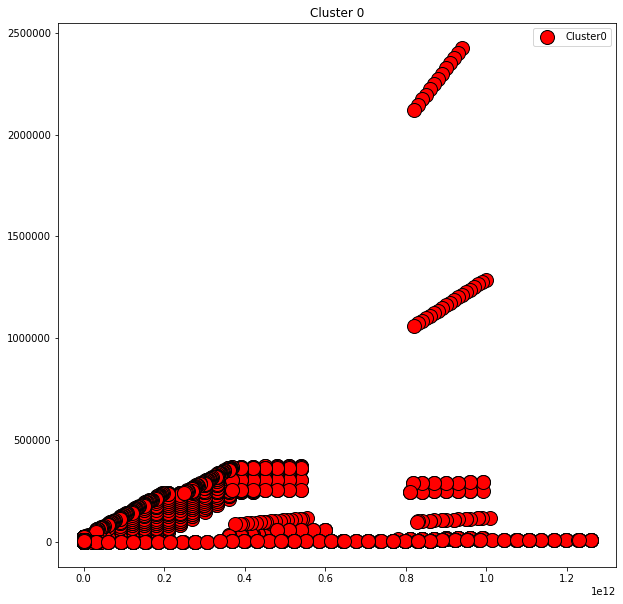

In [488]:
plt = plot_cluster(Xcluster["cluster0"], 0, ["event.duration", "network.bytes"])
plt.show()

As said before the LT approach first cluster is inserted into this new one. Probably, new traffic would be similar to that one. However, the plot shows us like two group of instances separated from the remaining ones. We can check what are them.

In [489]:
Xcluster["cluster0"]["network.bytes"] = Xcluster["cluster0"]["network.bytes"].astype("int64")
cluster0_check = Xcluster["cluster0"][(Xcluster["cluster0"]["network.bytes"] > 80000) & (Xcluster["cluster0"]["network.bytes"] < 2000000)]
print(cluster0_check["destination.port"].unique())
print(cluster0_check["source.port"].unique())

['22' '9,200' '35,228' '34,218' '5,671']
['34,179' '38,310' '5,671' '53,806' '53,810' '53,816' '53,860' '53,954'
 '54,070' '54,178' '54,322' '54,432' '54,578' '54,698' '54,782' '54,880'
 '55,030' '55,124' '55,274' '55,384' '55,520' '55,604' '55,692' '55,882'
 '55,980' '56,088' '56,292' '56,486' '56,574' '56,666' '56,812' '56,924'
 '57,014' '57,114' '57,208' '57,294' '57,374' '57,476' '57,568' '57,668'
 '57,798' '57,902' '57,996' '58,110' '58,306' '58,500' '58,592' '58,700'
 '58,804' '58,902' '59,092' '59,196' '59,316' '59,402' '59,496' '59,604'
 '59,688' '59,772' '59,888' '60,010' '60,242' '60,338' '60,442' '60,542'
 '60,638' '60,832' '60,914' '32,778' '32,924' '33,132' '33,804' '33,896'
 '33,994' '34,082' '34,274' '34,380' '34,534' '34,616' '34,738' '34,820'
 '34,954' '35,066' '35,164' '35,272' '35,364' '35,462' '35,620' '35,772'
 '35,852' '36,020' '36,140' '36,230' '36,320' '36,428' '36,536' '36,620'
 '36,716' '36,822' '36,920' '37,012' '37,150' '37,240' '37,344' '37,438'
 '37,584' '

/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The first group of points regards to SSH, RabbitMQ, Elastic and other ports destination traffic we are unable to identify.

In [490]:
Xcluster["cluster0"]["network.bytes"] = Xcluster["cluster0"]["network.bytes"].astype("int64")
cluster0_check = Xcluster["cluster0"][(Xcluster["cluster0"]["network.bytes"] > 2000000)]
print(cluster0_check["destination.port"].unique())
print(cluster0_check["source.port"].unique())

['9,200']
['38,310']


/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The second group is composed of traffic sent to Elasticsearch.

# Cluster 1

In [491]:
Xcluster["cluster1"]

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
9744,192.168.17.11,"48,208",35170,342,4800609417759,90876,986,55706,644,"5,671",192.168.17.18,tcp,ipv4
9746,192.168.17.17,"49,766",31908,306,4470081023857,83672,904,51764,598,"5,671",192.168.17.18,tcp,ipv4
9750,192.168.17.17,"49,762",25954,250,3600096742572,67820,734,41866,484,"5,671",192.168.17.18,tcp,ipv4
9767,192.168.17.17,"49,766",28758,276,4020096256837,75332,814,46574,538,"5,671",192.168.17.18,tcp,ipv4
9772,192.168.17.13,"47,634",30674,302,4080573640938,77532,842,46858,540,"5,671",192.168.17.18,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19620,192.168.17.14,"55,826",32884,316,4590048108301,86168,932,53284,616,"5,671",192.168.17.18,tcp,ipv4
19634,192.168.17.17,"49,766",35898,344,5040096848815,94236,1018,58338,674,"5,671",192.168.17.18,tcp,ipv4
19645,192.168.17.17,"49,774",26732,256,3750080784602,70328,760,43596,504,"5,671",192.168.17.18,tcp,ipv4
19650,192.168.17.17,"49,766",26448,254,3690081331405,69216,748,42768,494,"5,671",192.168.17.18,tcp,ipv4


Destination IPs seem to be private IPs. Destination ports are randomly generate ports and source ports on the one hand RabbitMQ port and in the other hand an impossible to identify port.

In [492]:
print("Destination IPs: "+Xcluster["cluster1"]["destination.ip"].unique())
print("Destination Ports: "+Xcluster["cluster1"]["destination.port"].unique())
print("Source IPs: "+Xcluster["cluster1"]["source.ip"].unique())
print("Source Ports: "+Xcluster["cluster1"]["source.port"].unique())

['Destination IPs: 192.168.17.11' 'Destination IPs: 192.168.17.17'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.2' 'Destination IPs: 192.168.17.18']
['Destination Ports: 48,208' 'Destination Ports: 49,766'
 'Destination Ports: 49,762' 'Destination Ports: 47,634'
 'Destination Ports: 55,806' 'Destination Ports: 55,826'
 'Destination Ports: 41,796' 'Destination Ports: 55,818'
 'Destination Ports: 47,618' 'Destination Ports: 48,216'
 'Destination Ports: 5,671' 'Destination Ports: 55,822'
 'Destination Ports: 41,804' 'Destination Ports: 48,212'
 'Destination Ports: 49,774' 'Destination Ports: 41,786'
 'Destination Ports: 49,758' 'Destination Ports: 55,814'
 'Destination Ports: 49,770']
['Source IPs: 192.168.17.18' 'Source IPs: 192.168.17.13']
['Source Ports: 5,671' 'Source Ports: 47,626']


In [493]:
xcluster_numeric = Xcluster["cluster1"][name2]
xcluster_numeric = xcluster_numeric.astype("int64")
xcluster_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,767.000000,767.000000,7.670000e+02,767.000000,767.000000,767.000000,767.000000
mean,31396.881356,308.406780,4.196629e+12,78833.074316,852.685789,47436.192960,544.279009
std,7013.459550,86.071689,7.086941e+11,13224.034114,143.097017,9302.930401,115.215409
min,21210.000000,202.000000,3.000096e+12,56156.000000,606.000000,23076.000000,224.000000
25%,26034.000000,251.000000,3.570335e+12,67536.000000,730.000000,40136.000000,463.000000
50%,30722.000000,294.000000,4.170113e+12,78112.000000,848.000000,47402.000000,548.000000
75%,35504.000000,342.000000,4.800101e+12,90060.000000,974.000000,55014.000000,636.000000
max,63664.000000,736.000000,5.520032e+12,103936.000000,1128.000000,64010.000000,740.000000


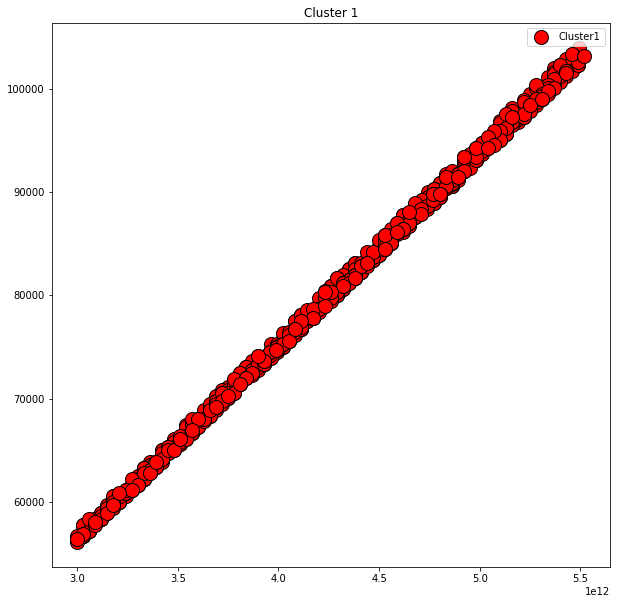

In [494]:
plt = plot_cluster(Xcluster["cluster1"], 1, ["event.duration", "network.bytes"])

# Cluster 2

In [495]:
Xcluster["cluster2"]

,destination.ip,destination.port,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,source.port,source.ip,network.transport,network.type
9769,192.168.17.18,"5,671",251472,3524,4807232444441,743660,7052,492188,3528,"49,750",192.168.17.17,tcp,ipv4
9819,192.168.17.18,"5,671",239320,3354,4577216217408,707858,6712,468538,3358,"49,750",192.168.17.17,tcp,ipv4
9832,192.168.17.14,"55,798",503558,3624,4941597812980,761792,7242,258234,3618,"5,671",192.168.17.18,tcp,ipv4
9893,192.168.17.18,"5,671",159868,2240,3054656348745,472922,4484,313054,2244,"49,750",192.168.17.17,tcp,ipv4
9941,192.168.17.18,"5,671",222396,3116,4257209989666,649740,6240,427344,3124,"42,744",192.168.17.12,tcp,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19549,192.168.17.14,"55,798",482154,3470,4731069966529,729398,6934,247244,3464,"5,671",192.168.17.18,tcp,ipv4
19598,192.168.17.18,"5,671",161982,2270,3094657784985,479218,4544,317236,2274,"49,750",192.168.17.17,tcp,ipv4
19612,192.168.17.18,"5,671",220480,3090,4216703681848,652188,6184,431708,3094,"49,750",192.168.17.17,tcp,ipv4
19714,192.168.17.18,"5,671",236254,3310,4527232808280,696092,6632,459838,3322,"48,202",192.168.17.11,tcp,ipv4


Both IPs, destination and origin IPs are private IPs, most of the ports appearing are randomly generated ones or RabbitMQ messaging system port.

In [496]:
print("Destination IPs: "+Xcluster["cluster2"]["destination.ip"].unique())
print("Destination Ports: "+Xcluster["cluster2"]["destination.port"].unique())
print("Source IPs: "+Xcluster["cluster2"]["source.ip"].unique())
print("Source Ports: "+Xcluster["cluster2"]["source.port"].unique())

['Destination IPs: 192.168.17.18' 'Destination IPs: 192.168.17.14'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 192.168.17.2']
['Destination Ports: 5,671' 'Destination Ports: 55,798'
 'Destination Ports: 47,610' 'Destination Ports: 41,780']
['Source IPs: 192.168.17.17' 'Source IPs: 192.168.17.18'
 'Source IPs: 192.168.17.12' 'Source IPs: 192.168.17.11']
['Source Ports: 49,750' 'Source Ports: 5,671' 'Source Ports: 42,744'
 'Source Ports: 48,202']


In [497]:
xcluster_numeric = Xcluster["cluster2"][name2]
xcluster_numeric = xcluster_numeric.astype("int64")
xcluster_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,243.000000,243.000000,2.430000e+02,243.000000,243.000000,243.000000,243.000000
mean,312834.699588,3029.851852,4.134156e+12,635840.205761,6061.522634,323005.506173,3031.670782
std,113722.607583,486.899020,6.650401e+11,102199.887921,972.899493,116589.797349,486.022028
min,158298.000000,2216.000000,3.018238e+12,464056.000000,4432.000000,158162.000000,2216.000000
25%,213421.000000,2612.000000,3.560416e+12,546600.000000,5221.000000,220350.000000,2612.000000
50%,273934.000000,3046.000000,4.156192e+12,639284.000000,6096.000000,314170.000000,3046.000000
75%,414970.000000,3431.000000,4.679155e+12,723275.000000,6861.000000,426456.000000,3432.000000
max,540262.000000,3904.000000,5.323650e+12,820866.000000,7802.000000,543248.000000,3902.000000


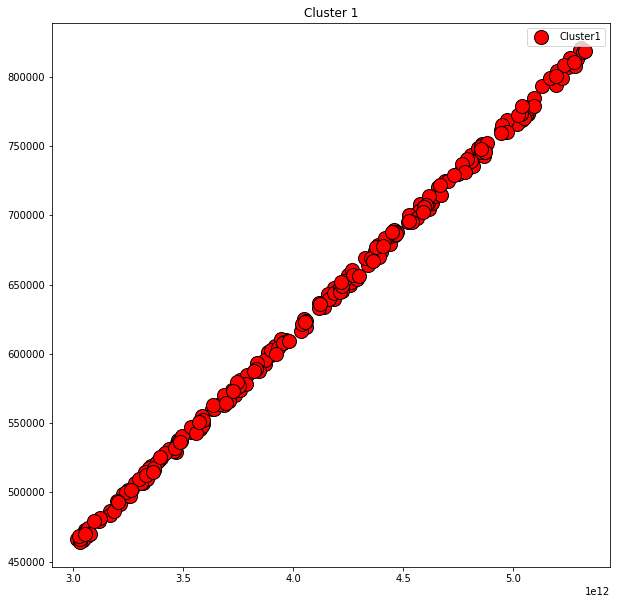

In [498]:
plt = plot_cluster(Xcluster["cluster2"], 1, ["event.duration", "network.bytes"])

# Outliers

In [93]:
x_outlier_df

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
272,3985926,24422,1019299385197,6387412,48844,2401486,24422
281,17638166,5222,1005212950986,100557483,15791,82919317,10569
285,374856,3980,990559416986,995968,7440,621112,3460
286,1139754,9684,1004193260026,5309484,27362,4169730,17678
297,245226,3454,540198264463,902342,8274,657116,4820
...,...,...,...,...,...,...,...
19510,22498434,138394,4949279096933,36278516,276788,13780082,138394
19571,894730,940,3810081641670,4854973,2756,3960243,1816
19585,727467,768,3090046470357,3941401,2245,3213934,1477
19675,23408834,143994,5149248214534,37746516,287988,14337682,143994


In [96]:
print("Destination IPs: "+x_outlier_df["destination.ip"].unique())
print("Destination Ports: "+x_outlier_df["destination.port"].unique())
print("Source IPs: "+x_outlier_df["source.ip"].unique())
print("Source Ports: "+x_outlier_df["source.port"].unique())

['Destination IPs: 192.168.17.18' 'Destination IPs: 34.238.162.185'
 'Destination IPs: 192.168.17.13' 'Destination IPs: 192.168.17.16'
 'Destination IPs: 192.168.17.17' 'Destination IPs: 192.168.17.2'
 'Destination IPs: 192.168.17.19' 'Destination IPs: 192.168.17.14']
['Destination Ports: 8,600' 'Destination Ports: 9,200'
 'Destination Ports: 41,142' 'Destination Ports: 45,838'
 'Destination Ports: 5,671' 'Destination Ports: 41,780'
 'Destination Ports: 47,610' 'Destination Ports: 55,798']
['Source IPs: 192.168.17.3' 'Source IPs: 172.31.91.217'
 'Source IPs: 192.168.17.17' 'Source IPs: 192.168.17.2'
 'Source IPs: 172.23.0.2' 'Source IPs: 192.168.17.11'
 'Source IPs: 192.168.17.18' 'Source IPs: 192.168.17.12']
['Source Ports: 45,007' 'Source Ports: 40,992' 'Source Ports: 5,671'
 'Source Ports: 53,820' 'Source Ports: 48,878' 'Source Ports: 49,266'
 'Source Ports: 48,202' 'Source Ports: 43,099' 'Source Ports: 42,744']


In [98]:
xoutlier_numeric = x_outlier_df[name2]
xoutlier_numeric = xoutlier_numeric.astype("int64")
xoutlier_numeric.describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets
count,2.580000e+02,258.000000,2.580000e+02,2.580000e+02,258.000000,2.580000e+02,258.000000
mean,9.618899e+06,25117.062016,2.970793e+12,4.060992e+07,51544.910853,3.099102e+07,26427.848837
std,1.086693e+07,41937.135496,1.747051e+12,5.635759e+07,83248.745622,4.699814e+07,41345.538492
min,1.582980e+05,764.000000,3.694756e+11,4.652720e+05,2233.000000,1.587800e+05,1469.000000
25%,9.886910e+05,2221.000000,9.304319e+11,5.203831e+06,5913.000000,2.599706e+06,3449.000000
50%,2.234121e+06,4996.500000,3.510308e+12,9.049339e+06,15112.500000,7.380843e+06,10116.000000
75%,1.943039e+07,21005.500000,4.407105e+12,3.869979e+07,41617.250000,1.469982e+07,20165.000000
max,3.439649e+07,149590.000000,5.505192e+12,1.910589e+08,299180.000000,1.566624e+08,149590.000000


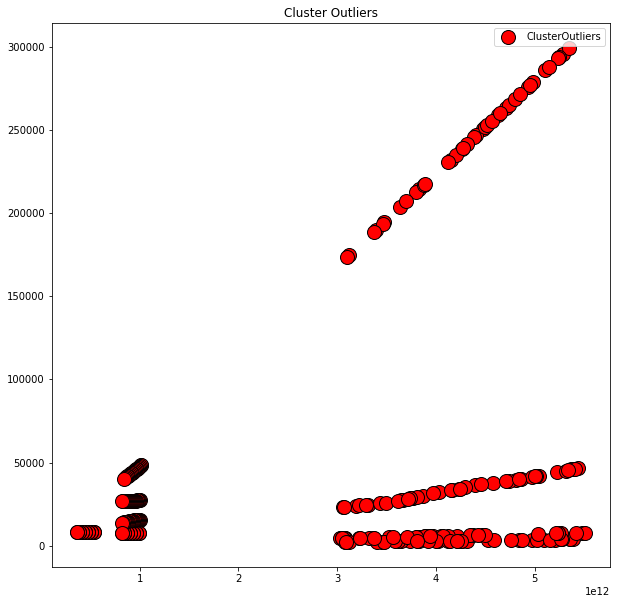

In [97]:
plt = plot_cluster(x_outlier_df, "Outliers", ["event.duration", "network.packets"])

In [499]:
x_clust_df["event.duration"].unique()

array(['934325235', '179059', '5969612', ..., '532865', '1623590',
       '995913'], dtype=object)

# Clusters vs Outliers

In [500]:
X_clust_ports_info = X_clust[["destination.port", "source.port"]]
X_outlier_ports_info = x_outlier_df[["destination.port", "source.port"]]
cluster_outliers_similarities = X_clust_ports_info.merge(X_outlier_ports_info, how = 'inner' ,indicator=False, on=["destination.port", "source.port"])
cluster_outliers_similarities.drop_duplicates()

,destination.port,source.port
0,"9,200","38,310"
192,"55,798","5,671"
260,"47,610","5,671"
485,"5,671","48,202"
557,"41,780","5,671"


There is traffic of same "type" in the clusters and the outliers, we can check why this occurs.

In [501]:
columns = name2 + ["destination.port", "source.port"]
X_clust_numeric = X_clust[columns]
for i in range(len(columns)):
    X_clust_numeric[columns[i]].replace(',','',regex=True,inplace=True)

X_clust_numeric = X_clust_numeric.astype("int64")
X_clust_numeric[(X_clust_numeric["destination.port"] == 5671) & (X_clust_numeric["source.port"] == 48202)].describe()

/Users/onintzaugarte/opt/anaconda3/envs/machinglearning/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
count,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.0,36.0
mean,217342.944444,3045.166667,4.165612e+12,640518.833333,6102.333333,423175.888889,3057.166667,5671.0,48202.0
std,37138.411996,520.330307,7.110369e+11,109152.470049,1040.660614,72014.067326,520.330307,0.0,0.0
min,159324.000000,2232.000000,3.054659e+12,469938.000000,4476.000000,310614.000000,2244.000000,5671.0,48202.0
25%,183795.000000,2575.000000,3.523186e+12,541889.500000,5162.000000,358094.500000,2587.000000,5671.0,48202.0
50%,216592.000000,3035.000000,4.151713e+12,638396.000000,6082.000000,421804.000000,3047.000000,5671.0,48202.0
75%,249342.500000,3493.500000,4.777434e+12,734587.500000,6999.000000,485245.000000,3505.500000,5671.0,48202.0
max,277618.000000,3890.000000,5.318529e+12,817750.000000,7792.000000,540132.000000,3902.000000,5671.0,48202.0


In [502]:
columns = name2 + ["destination.port", "source.port"]
outlier_numeric = x_outlier_df[columns]
for i in range(len(columns)):
    outlier_numeric[columns[i]].replace(',','',regex=True,inplace=True)

outlier_numeric = outlier_numeric.astype("int64")
outlier_numeric[(outlier_numeric["destination.port"] == 5671) & (outlier_numeric["source.port"] == 48202)]

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
17901,283354,3970,5428863776580,834552,7952,551198,3982,5671,48202
18292,284516,3986,5452610316164,837860,7984,553344,3998,5671,48202


In this case, seems to be changes, the outlier instances are generally lower in duration, bytes and packets.

In [503]:
columns = name2 + ["destination.port", "source.port"]
X_clust_numeric = X_clust[columns]
for i in range(len(columns)):
    X_clust_numeric[columns[i]].replace(',','',regex=True,inplace=True)

X_clust_numeric = X_clust_numeric.astype("int64")
X_clust_numeric[(X_clust_numeric["destination.port"] == 55798) & (X_clust_numeric["source.port"] == 5671)].describe()

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
count,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.0,34.0
mean,401407.882353,2889.235294,3.937504e+12,607493.352941,5776.352941,206085.470588,2887.117647,55798.0,5671.0
std,70864.865612,509.845613,6.964321e+11,107066.546272,1017.096220,36201.786861,507.251463,0.0,0.0
min,307892.000000,2216.000000,3.018238e+12,466054.000000,4432.000000,158162.000000,2216.000000,55798.0,5671.0
25%,344841.500000,2482.000000,3.381791e+12,521998.000000,4964.000000,177156.500000,2482.000000,55798.0,5671.0
50%,380779.000000,2741.000000,3.735053e+12,576454.000000,5482.000000,195675.000000,2741.000000,55798.0,5671.0
75%,454131.500000,3268.500000,4.455575e+12,687007.500000,6531.000000,232876.000000,3262.500000,55798.0,5671.0
max,540246.000000,3888.000000,5.302111e+12,817320.000000,7770.000000,277074.000000,3882.000000,55798.0,5671.0


In [504]:
columns = name2 + ["destination.port", "source.port"]
outlier_numeric = x_outlier_df[columns]
for i in range(len(columns)):
    outlier_numeric[columns[i]].replace(',','',regex=True,inplace=True)

outlier_numeric = outlier_numeric.astype("int64")
outlier_numeric[(outlier_numeric["destination.port"] == 55798) & (outlier_numeric["source.port"] == 5671)]

,destination.bytes,destination.packets,event.duration,network.bytes,network.packets,source.bytes,source.packets,destination.port,source.port
12395,562686,4050,5522588631983,851368,8094,288682,4044,55798,5671
15061,559628,4028,5492604349623,846740,8050,287112,4022,55798,5671


The same occurs in this case.

### OPTICS

In [505]:
# Clustering Optics
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np

In [506]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X = normalize(X) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X) 
  
# Renaming the columns 
X.columns = X.columns 
  
X.head() 

,0,1,2,3,4,5,6
0,-0.244357,-0.239955,-0.838132,-0.187466,-0.241887,-0.165036,-0.243631
1,-0.247416,-0.242815,-0.835224,-0.187643,-0.244292,-0.164405,-0.245580
2,-0.246562,-0.239270,-0.838150,-0.187580,-0.241197,-0.164565,-0.242936
3,-0.232483,-0.234410,-0.849246,-0.181831,-0.235036,-0.161332,-0.235483
4,-0.247062,-0.240409,-0.837713,-0.187782,-0.241457,-0.164677,-0.242319


Building clustering model

In [507]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 90, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
op_model = optics_model.fit(X) 

Storing result of trainning

In [508]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                core_distances = optics_model.core_distances_, 
                                ordering = optics_model.ordering_, eps = 0.5) 

# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                core_distances = optics_model.core_distances_, 
                                ordering = optics_model.ordering_, eps = 2) 

# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X)) 

# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 

# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 

print(labels) 



[-1 -1 -1 ... -1 -1 -1]


Plot result

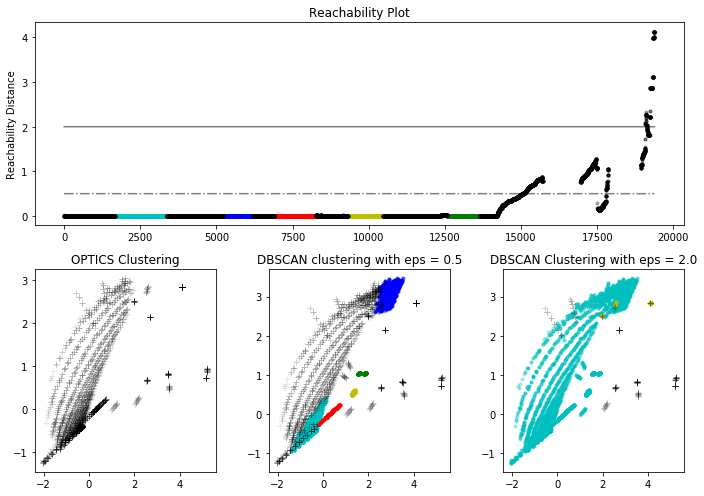

In [509]:
# Defining the framework of the visualization 
X = pd.DataFrame(X)
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X.iloc[optics_model.labels_ == -1, 0], 
         X.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X.iloc[labels1 == -1, 0], 
        X.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X.iloc[labels2 == -1, 0], 
        X.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show()



### HDBSCAN

In [510]:
import hdbscan

X_standarized = StandardScaler().fit_transform(X)



In [511]:

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_standarized = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
#X_normal = normalize(X_standarized) 
  
    
# Converting the numpy array into a pandas DataFrame 
X_df = pd.DataFrame(X_normal) 
  

X_df.head() 

,0,1,2,3,4,5,6
0,0.337567,-0.109718,0.902152,0.166413,-0.100485,0.122165,-0.086127
1,0.553484,0.037072,0.299007,0.548991,0.096847,0.510551,0.177319
2,0.463409,-0.029816,0.530984,0.509452,0.022182,0.483420,0.093222
3,0.604947,0.062111,0.092342,0.568537,0.091397,0.522631,0.130088
4,-0.001179,-0.133498,0.962000,0.128514,-0.112431,0.144615,-0.081621


In [512]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
labels = clusterer.fit(X_df)
labels

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

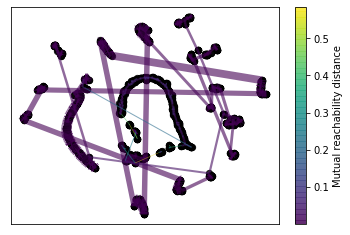

In [513]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=40, 
                                      edge_linewidth=0.5)

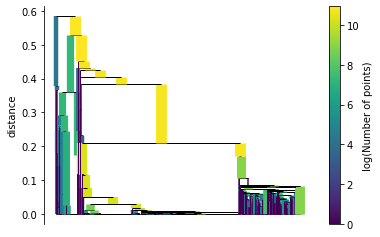

In [514]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)